# Análisis exploratorio de datos de MOOCs

En este notebook exploraremos 4 datasets provistos que contienen información acerca de los MOOCs(Massive online open courses), en la exploración de datos trataremos de encotrar relaciones entre sus variables, así como su importancia para el análisis. Y finalmente se exportará la data para posteriormente armar un dashboard en PowerBI.

## Librerías utilizadas

In [74]:
# Imports necesarios para el EDA y los gráficos
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Cargando los datos

In [75]:
edx_df = pd.read_csv('data/edx_courses.csv')
udemy_df = pd.read_csv('data/udemy_courses.csv')
coursera_df = pd.read_csv('data/coursera_courses.csv')

reviews = pd.read_csv('data/coursera_reviews.csv')

Antes de hacer una exploración de los datos haremos una pequeña limpieza a los mismos.

## Explorando edx

In [76]:
edx_df.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [77]:
edx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Es un bastante completo, aún así hay algunas cosas que hacer, procederemos llenando los nulos con 'Sin dato' excepto n_enrolled que se le pondrá 0

In [78]:
# Borramos si existe algún duplicado
edx_df = edx_df.drop_duplicates()

In [79]:
edx_df['n_enrolled'] = edx_df['n_enrolled'].fillna(0)
edx_df['n_enrolled'] = edx_df['n_enrolled'].apply(lambda x: str(x).replace(',', ''))
edx_df['n_enrolled'] = edx_df['n_enrolled'].astype(int)
edx_df['n_enrolled'].head(2) # Verificando el tipo de dato

0    124980
1    293864
Name: n_enrolled, dtype: int64

In [80]:
edx_df = edx_df.fillna('Sin dato')
edx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               974 non-null    object
 1   summary             974 non-null    object
 2   n_enrolled          974 non-null    int64 
 3   course_type         974 non-null    object
 4   institution         974 non-null    object
 5   instructors         974 non-null    object
 6   Level               974 non-null    object
 7   subject             974 non-null    object
 8   language            974 non-null    object
 9   subtitles           974 non-null    object
 10  course_effort       974 non-null    object
 11  course_length       974 non-null    object
 12  price               974 non-null    object
 13  course_description  974 non-null    object
 14  course_syllabus     974 non-null    object
 15  course_url          974 non-null    object
dtypes: int64(1), object(15)
me

Utilizaremos course_effort y course_length para sacar un aproximado de la duración del curso

In [81]:
edx_df['course_effort'][0:2]

0    2–3 hours per week
1    2–4 hours per week
Name: course_effort, dtype: object

In [82]:
def avg_effort(effort):
    time = effort.split()[0]
    ab = time.split('–')

    return (int(ab[0])+int(ab[1]))/2

In [83]:
edx_df['course_effort'] = edx_df['course_effort'].apply(avg_effort)

In [84]:
edx_df['course_effort'] = edx_df['course_effort'].astype(float)

In [85]:
edx_df['course_length'][0:2]

0    2 Weeks
1    7 Weeks
Name: course_length, dtype: object

In [86]:
edx_df['course_length'] = edx_df['course_length'].apply(lambda x: x.split()[0]) # Separamos course_length y nos quedamos con el número que representa a la semana
edx_df['course_length'] = edx_df['course_length'].astype(int)

In [87]:
edx_df['content_duration'] = edx_df['course_effort'] * edx_df['course_length']
print(list(edx_df['content_duration'].value_counts().index))

[30.0, 24.0, 21.0, 15.0, 20.0, 18.0, 12.0, 35.0, 28.0, 10.0, 17.5, 6.0, 16.0, 42.0, 25.0, 90.0, 26.0, 14.0, 45.0, 22.5, 12.5, 27.0, 54.0, 72.0, 31.5, 40.0, 36.0, 63.0, 60.0, 33.0, 49.0, 108.0, 56.0, 7.5, 70.0, 42.5, 24.5, 48.0, 10.5, 27.5, 32.0, 50.0, 47.5, 84.0, 120.0, 9.0, 13.5, 1.5, 126.0, 112.0, 37.5, 4.0, 76.0, 5.0, 180.0, 160.0, 3.0, 154.0, 132.0, 4.5, 130.0, 95.0, 147.0, 52.5, 7.0, 64.0, 32.5, 144.0, 22.0, 110.0, 75.0, 150.0, 66.0, 162.5, 105.0, 140.0, 55.0, 187.0, 81.0, 225.0, 40.5, 38.5, 168.0, 44.0, 94.5, 192.0, 49.5, 71.5, 142.5, 57.0, 3.5, 52.0, 96.0, 19.5, 38.0, 77.0, 11.0, 176.0, 100.0, 127.5, 16.5]


In [88]:
ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0-10h', '10-20h', '20-30h', '30-40h', '40-50h', '50-60h', '60-70h', '70-80h', '80h+']

edx_df['duration_interval'] = pd.cut(edx_df['content_duration'], bins=ranges, labels=labels, right=False)

Ahora investigamos la variable precio

In [89]:
# Devuelve un dataset que el precio no sea gratis
edx_df[edx_df['price'].apply(lambda x: not x.startswith('FREE'))]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,content_duration,duration_interval


Del dataset vacío anterior, podemos concluir que:
Si bien todos los cursos se los puede llevar gratis, los certificados se pagan, por lo que la columna price le ponemos el precio del certificado

In [90]:
edx_df['price'] = edx_df['price'].apply(lambda x: (x.split('$')[1]).split()[0])
edx_df['price'] = edx_df['price'].astype(float)
edx_df['price']

0       49.0
1       49.0
2       90.0
3      199.0
4      249.0
       ...  
970     25.0
971    139.0
972    139.0
973     25.0
974     79.0
Name: price, Length: 974, dtype: float64

In [91]:
# Renombramos columnas para tener mayor consistencia en los datos
edx_df = edx_df.rename(columns={'n_enrolled': 'num_subscribers', 'Level': 'level'})

### Buscando relaciones

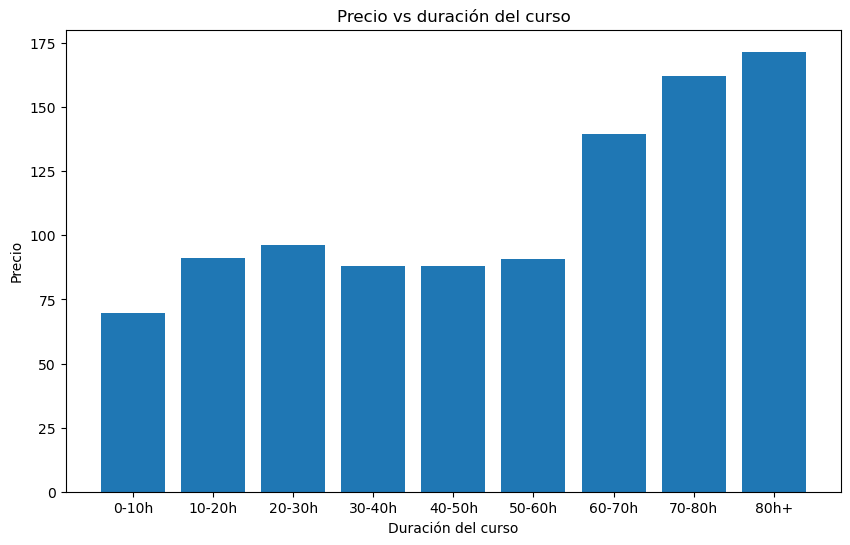

In [92]:
duration_grouped = edx_df.groupby('duration_interval').agg({'price': 'mean', 'num_subscribers': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))

plt.bar(duration_grouped['duration_interval'], duration_grouped['price'])

plt.title('Precio vs duración del curso')
plt.xlabel('Duración del curso')
plt.ylabel('Precio')

plt.show()

Observamos que a mayor duración del curso, más precio tiene.

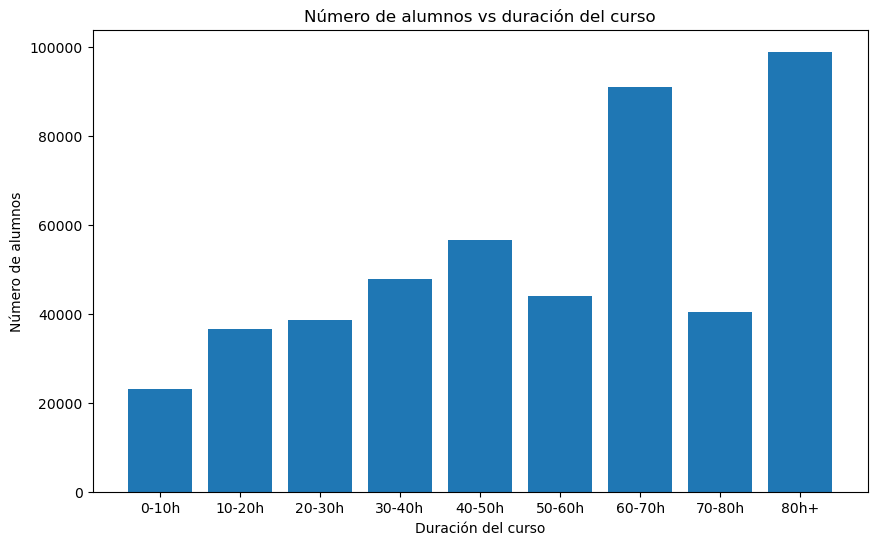

In [93]:
plt.figure(figsize=(10, 6))

plt.bar(duration_grouped['duration_interval'], duration_grouped['num_subscribers'])

plt.title('Número de alumnos vs duración del curso')
plt.xlabel('Duración del curso')
plt.ylabel('Número de alumnos')

plt.show()

Aquí vemos que a mayor duración de curso también se inscriben más personas, a excepción de 50-60 horas y 70-80 horas, en los cuales el promedio de alumnos decae.

#### Creamos una función para agrupar los cursos por tipo de instituto, para así poder buscar más relaciones

In [94]:
# Se crea una función para segmentar por tipo de institución
def type_institution(ins):
    ins = ins.lower()
    if 'universi' in ins or 'college' in ins:
        ins = 'University'
    elif 'institute' in ins:
        ins = 'Institute'
    else:
        ins = 'Other'

    return ins

In [95]:
edx_df['type_ins'] = edx_df['institution'].apply(type_institution)
edx_df['type_ins'].value_counts()

University    695
Other         201
Institute      78
Name: type_ins, dtype: int64

Buscamos relación entre cursos dictados por universidades, institutos u otros y la cantidad de alumnos inscritos

In [96]:
subscribers_mean_by_institution = edx_df.groupby('type_ins')['num_subscribers'].mean()
subscribers_mean_by_institution

type_ins
Institute     37935.269231
Other         38889.268657
University    49877.143885
Name: num_subscribers, dtype: float64

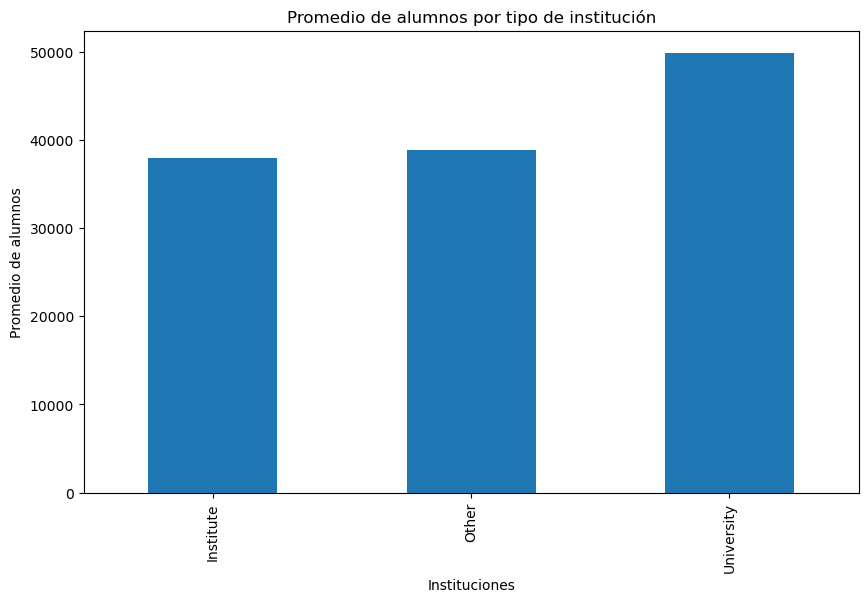

In [97]:
plt.figure(figsize=(10, 6))
subscribers_mean_by_institution.plot(kind='bar')

plt.title('Promedio de alumnos por tipo de institución')
plt.ylabel('Promedio de alumnos')
plt.xlabel('Instituciones')

plt.show()

Podemos ver que en promedio, los cursos impartidos por universidades tienen 10000 alumnos más que los cursos impartidos por institutos y otros.

In [98]:
price_course_type = edx_df.groupby('course_type')['price'].mean()
price_course_type

course_type
Instructor-led on a course schedule    197.310345
Self-paced on your time                 94.335000
Name: price, dtype: float64

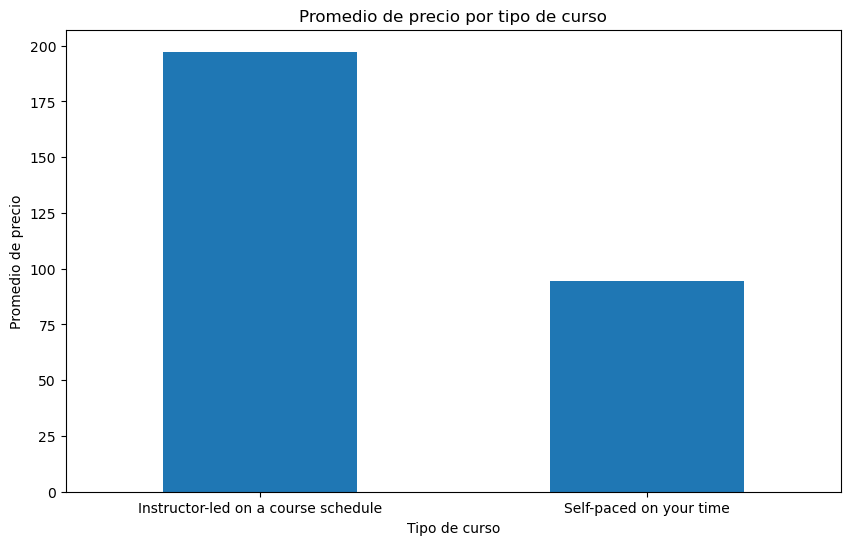

In [99]:
plt.figure(figsize=(10, 6))
price_course_type.plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Promedio de precio por tipo de curso')
plt.ylabel('Promedio de precio')
plt.xlabel('Tipo de curso')

plt.show()

En el gráfico vemos que tener un instructor junto con un horario específico es hasta el doble de costoso que un curso grabado, con estos datos podemos ver cuántos alumnos se inscriben a cada curso

In [100]:
subscribers_course_type = edx_df.groupby('course_type')['num_subscribers'].mean()
subscribers_course_type

course_type
Instructor-led on a course schedule    40875.379310
Self-paced on your time                47019.145197
Name: num_subscribers, dtype: float64

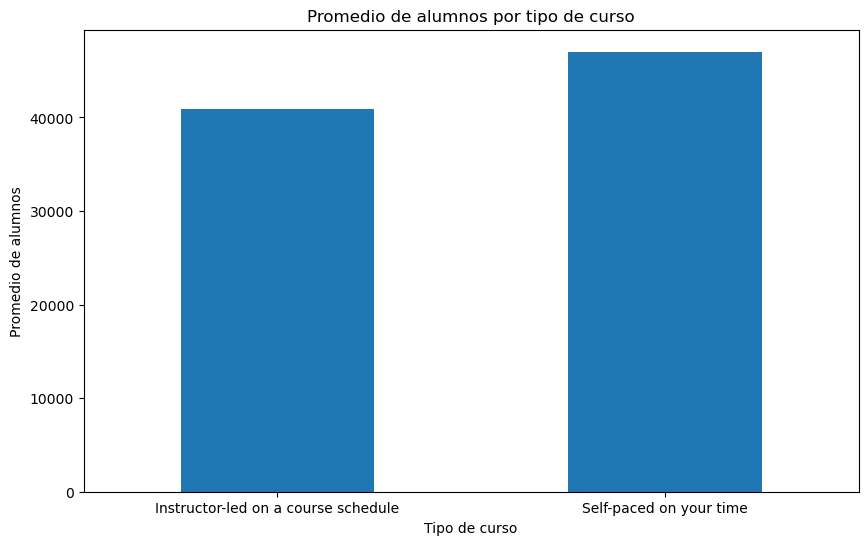

In [101]:
plt.figure(figsize=(10, 6))
subscribers_course_type.plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Promedio de alumnos por tipo de curso')
plt.ylabel('Promedio de alumnos')
plt.xlabel('Tipo de curso')

plt.show()

Acá vemos que más alumnos se inscriben a cursos grabados, pero la diferencia es de menos del 20%.

In [102]:
# Procedemos a buscar cuántos cursos tiene cada tipo.
edx_df['course_type'].value_counts()

Self-paced on your time                916
Instructor-led on a course schedule     58
Name: course_type, dtype: int64

#### Encontramos algo interesante, se podrían explotar los cursos impartidos por profesores, ya que si bien en promedio se inscriben un 20% menos de personas, las ganancias que generan pueden ser del doble

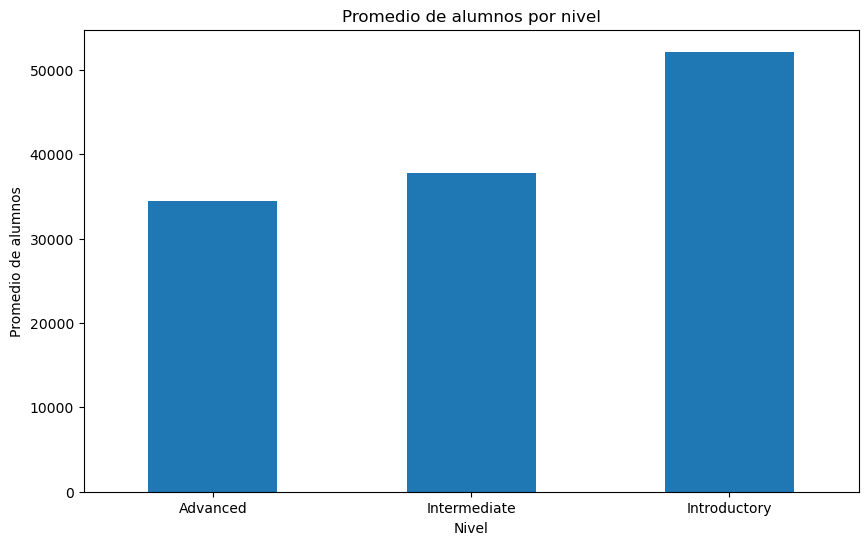

In [103]:
# Buscamos más correlaciones
subscribers_by_level = edx_df.groupby('level')['num_subscribers'].mean()

plt.figure(figsize=(10, 6))

subscribers_by_level.plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Promedio de alumnos por nivel')
plt.ylabel('Promedio de alumnos')
plt.xlabel('Nivel')

plt.show()

Vemos que en los cursos introductorios hay un 50% más de alumnos en promedio a diferencia de los cursos advanced

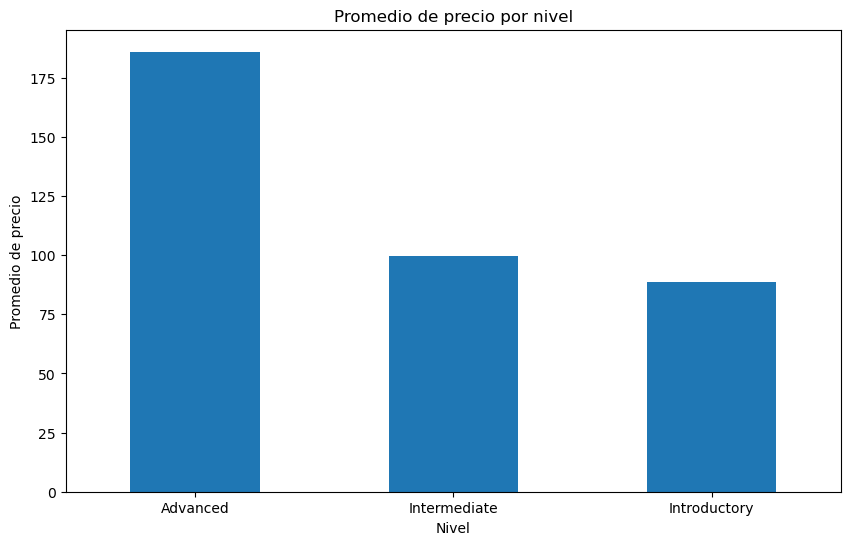

In [104]:
price_by_level = edx_df.groupby('level')['price'].mean()

plt.figure(figsize=(10, 6))
price_by_level.plot(kind='bar')

plt.xticks(rotation=0)
plt.title('Promedio de precio por nivel')
plt.ylabel('Promedio de precio')
plt.xlabel('Nivel')

plt.show()

Podemos ver que los cursos advanced son el doble de costosos que los introductorios y los intermedios.

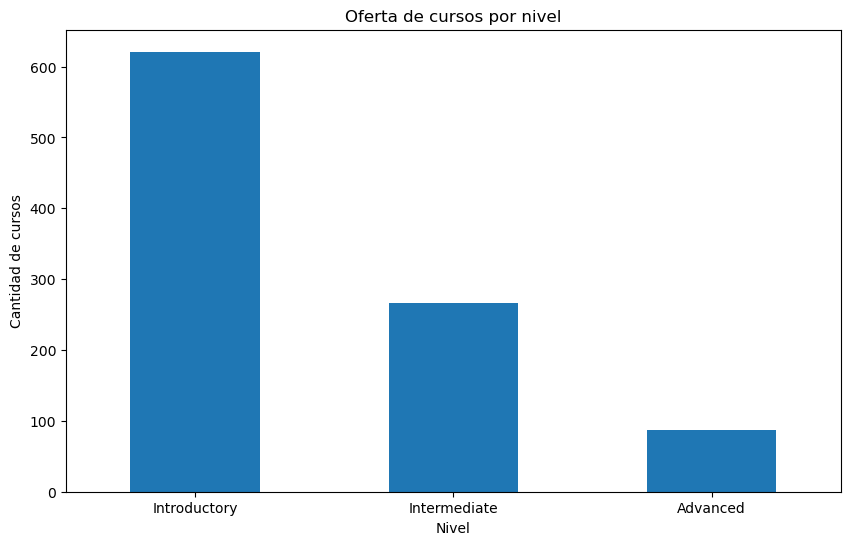

In [105]:
level_counts = edx_df['level'].value_counts()

plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar')

plt.title('Oferta de cursos por nivel')
plt.ylabel('Cantidad de cursos')
plt.xlabel('Nivel')

plt.xticks(rotation=0)

plt.show()

Vemos que hay mucha diferencia en las oferta de cursos por niveles

In [106]:
intro_edx = edx_df[edx_df['level']=='Introductory']
intro_edx[intro_edx['title'].apply(lambda x: 'Python' in x)].head(5)

,title,summary,num_subscribers,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,content_duration,duration_interval,type_ins
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,3.0,7,49.0,This course aims to teach everyone the basics ...,Sin dato,https://www.edx.org/course/programming-for-eve...,21.0,20-30h,University
17,Python Basics for Data Science,This Python course provides a beginner-friendl...,228809,Self-paced on your time,IBM,Joseph Santarcangelo,Introductory,Data Analysis & Statistics,English,English,3.5,5,39.0,Kickstart your learning of Python for data sci...,Module 1 - Python Basics\nYour first program\n...,https://www.edx.org/course/python-basics-for-d...,17.5,10-20h,Other
20,CS50's Introduction to Artificial Intelligence...,Learn to use machine learning in Python in thi...,258006,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Introductory,Computer Science,English,English,20.0,7,199.0,"AI is transforming how we live, work, and play...",Sin dato,https://www.edx.org/course/cs50s-introduction-...,140.0,80h+,University
69,Computing in Python I: Fundamentals and Proced...,"Learn the fundamentals of computing in Python,...",141966,Self-paced on your time,The Georgia Institute of Technology,David Joyner,Introductory,Computer Science,English,English,9.5,5,99.0,"This course starts from the beginning, coverin...",Chapter 1: Computing. The fundamentals of how ...,https://www.edx.org/course/computing-in-python...,47.5,40-50h,Institute
88,Machine Learning with Python: A Practical Intr...,Machine Learning can be an incredibly benefici...,80161,Self-paced on your time,IBM,Saeed Aghabozorgi,Introductory,Data Analysis & Statistics,English,English,5.0,5,39.0,About this courseThis Machine Learning with Py...,Module 1 - Introduction to Machine Learning\nA...,https://www.edx.org/course/machine-learning-wi...,25.0,20-30h,Other


#### Para el dataset de edx podemos concluir que hay dos huecos en el mercado que aún no están siendo explotados:

- El primero serían los cursos impartidos en vivo con algún docente, que si bien tienen un 20% menos de alumnos inscritos, este tipo de cursos valen el doble.

- El segundo son los cursos avanzados, que lógicamente tienen menos alumnos que los introductorios (un 50% menos aprox.), pero aún así, al igual que el anterior, la ganancia puede ser del doble.

#### Además hay que tener en cuenta que en ambos casos, hay muy pocos cursos avanzados y cursos en vivo, por lo que aún pueden haber varios cursos que aún no se han enseñado, a diferencia de los introductorios, en los que puedes encontar de casi todo, e incluso cursos repetidos impartidos por diferentes docentes.

## Explorando udemy

In [107]:
udemy_df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [108]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Empezaremos borrando duplicados y luego viendo las relaciones que podemos sacar del dataset de udemy

In [109]:
udemy_df = udemy_df.drop_duplicates()
len(udemy_df) # Solo había 6 duplicados

3672

Convertimos la variable is_paid de True a 1 y False a 0

In [110]:
udemy_df['is_paid'] = udemy_df['is_paid'].replace({True: 1, False: 0})

Convertimos la variable level a Introductory, Intermediate y Advanced como en el dataframe anterior

In [111]:
udemy_df['level'] = udemy_df['level'].replace({'Beginner Level': 'Introductory', 'Intermediate Level': 'Intermediate', 'Expert Level': 'Advanced'})

Empezamos explorando la relación entre los cursos pagos y gratis con su relación de alumnos

In [112]:
paid = udemy_df[udemy_df['is_paid']==1]
print(paid.num_subscribers.sum()/paid.num_subscribers.count())
not_paid = udemy_df[udemy_df['is_paid']==0]
print(not_paid.num_subscribers.sum()/not_paid.num_subscribers.count())

2421.2700773349197
11533.951612903225


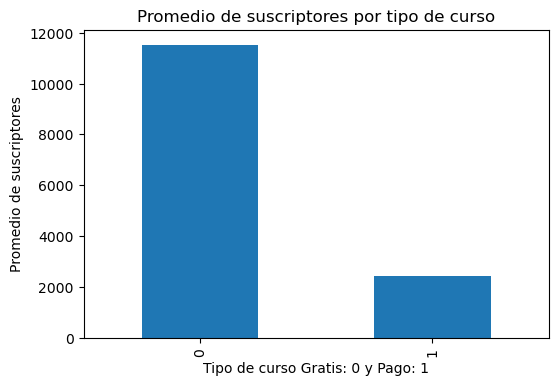

In [113]:
paid_subscribers = udemy_df.groupby('is_paid')['num_subscribers'].mean()

plt.figure(figsize=(6, 4))
paid_subscribers.plot(kind='bar')

plt.title('Promedio de suscriptores por tipo de curso')
plt.xlabel('Tipo de curso Gratis: 0 y Pago: 1')
plt.ylabel('Promedio de suscriptores')

plt.show()

Aquí vemos que en los cursos gratuitos se inscriben aproximaadmente 5 veces más personas que en lo cursos pagos.

Procedemos a buscar relación entre duración del curso con precio y número de suscriptores, para ver mejor las correlaciones agruparemos por intervalos de duración al igual que edx.

In [114]:
ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0-10h', '10-20h', '20-30h', '30-40h', '40-50h', '50-60h', '60-70h', '70-80h', '80h+']

udemy_df['duration_interval'] = pd.cut(udemy_df['content_duration'], bins=ranges, labels=labels, right=False)

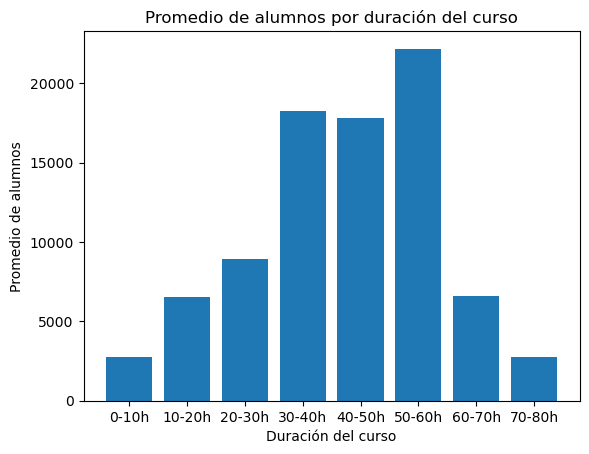

In [115]:
subscribers_by_duration = udemy_df.groupby('duration_interval')['num_subscribers'].mean()

plt.bar(subscribers_by_duration.index, subscribers_by_duration)

plt.title('Promedio de alumnos por duración del curso')
plt.xlabel('Duración del curso')
plt.ylabel('Promedio de alumnos')

plt.show()

Los cursos con más alumnos son los que están en el intervalo de 30 a 60 horas.

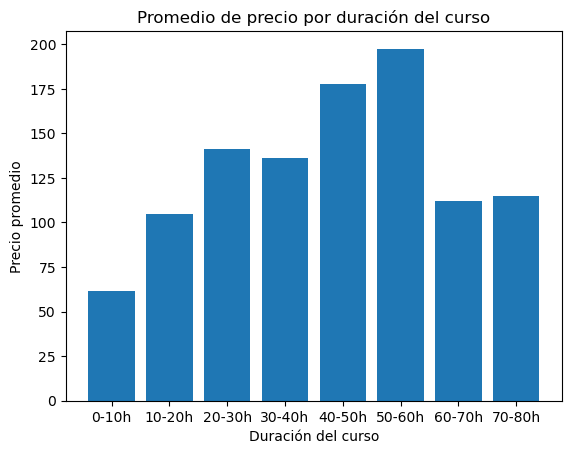

In [116]:
duration = udemy_df.groupby('duration_interval').agg({'price': 'mean', 'num_subscribers': 'mean'}).reset_index()

plt.bar(duration['duration_interval'], duration['price'])
plt.title('Promedio de precio por duración del curso')
plt.xlabel('Duración del curso')
plt.ylabel('Precio promedio')
plt.show()

Vemos que de 0 a 60 horas el precio va aumentando gradualmente, pero de 60 horas para arriba el precio vuelve a los niveles de un curso de 20 horas. Esto se correlaciona con la gráfica anterior, en la cual los cursos que duran más de 60 horas tienen claramente menos alumnos.

### Pasamos a buscar relación entre pormedio de suscriptores y el nivel de dificultad

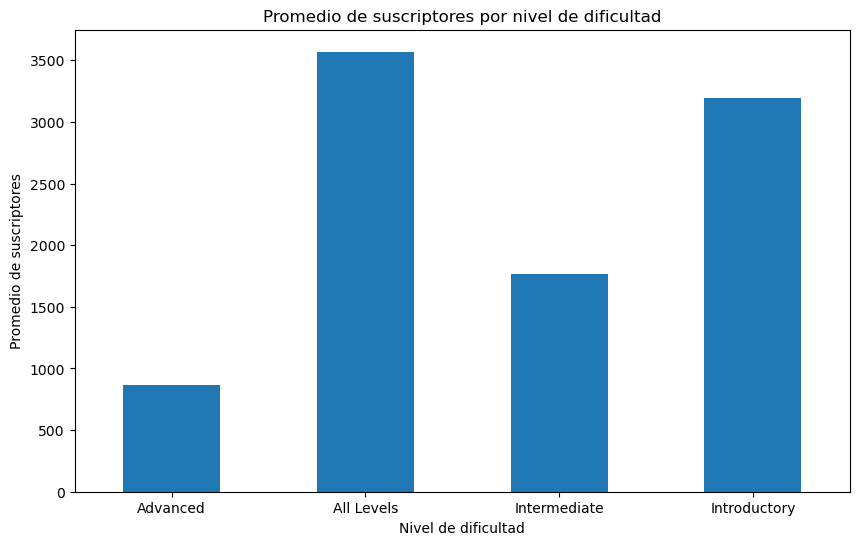

In [117]:
level_subscribers = udemy_df.groupby('level')['num_subscribers'].mean()

plt.figure(figsize=(10, 6))
level_subscribers.plot(kind='bar')

plt.title('Promedio de suscriptores por nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Promedio de suscriptores')

plt.xticks(rotation=0)

plt.show()

A diferencia del dataset de edx, en udemy los alumnos sí decrecen significativamente a medida que sube el nivel, así que buscamos cuántos cursos de cada nivel hay:

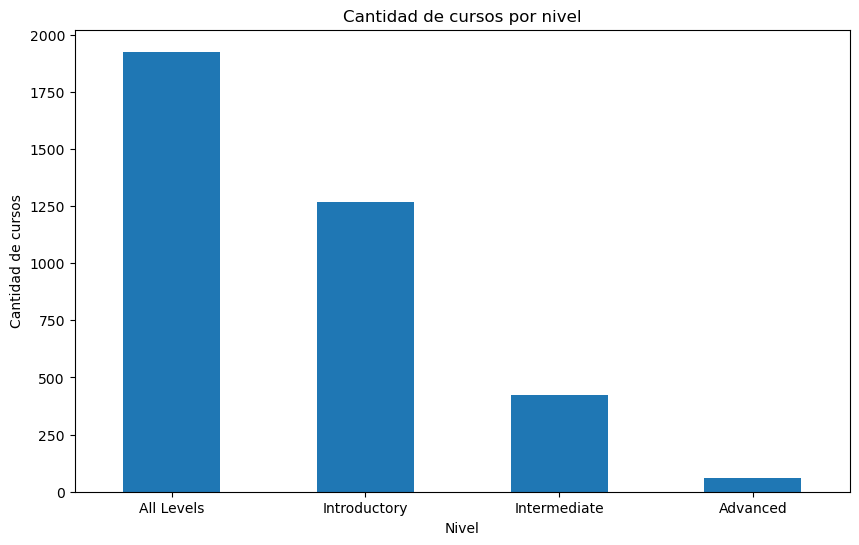

In [118]:
course_count_by_level = udemy_df['level'].value_counts()

plt.figure(figsize=(10, 6))
course_count_by_level.plot(kind='bar')

plt.title('Cantidad de cursos por nivel')
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')

plt.xticks(rotation=0)

plt.show()

La relación entre cursos disponibles por cada nivel se va muy a favor de los cursos introductorios y los cursos que son para todos los niveles.

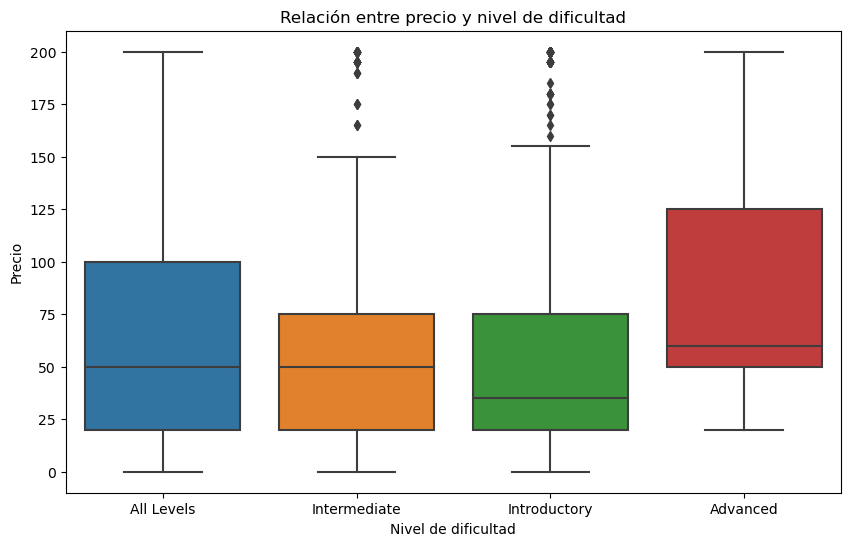

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='level', y='price', data=udemy_df)

plt.title('Relación entre precio y nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Precio')

plt.show()

Vemos que todos menos los cursos avanzados tienen precios desde los 0 a los 200 dólares, aunque la mayoría anda por menos de 75 dólares, en cambio en los cursos avanzados, la media está por los 60 dólares y la mayoría anda por encima de ese precio.

In [120]:
# Buscando los cursos con más alumnos
top_courses = udemy_df.nlargest(10, 'num_subscribers')
top_courses[['course_title', 'num_subscribers', 'subject']]

,course_title,num_subscribers,subject
2827,Learn HTML5 Programming From Scratch,268923,Web Development
3032,Coding for Entrepreneurs Basic,161029,Web Development
3230,The Web Developer Bootcamp,121584,Web Development
2783,Build Your First Website in 1 Week with HTML5 ...,120291,Web Development
3232,The Complete Web Developer Course 2.0,114512,Web Development
1896,Free Beginner Electric Guitar Lessons,101154,Musical Instruments
2589,Web Design for Web Developers: Build Beautiful...,98867,Web Development
2619,Learn Javascript & JQuery From Scratch,84897,Web Development
3289,Practical PHP: Master the Basics and Code Dyna...,83737,Web Development
3247,JavaScript: Understanding the Weird Parts,79612,Web Development


Acá vemos que 9 de los 10 cursos más tomados tienen que ver con el desarrollo web

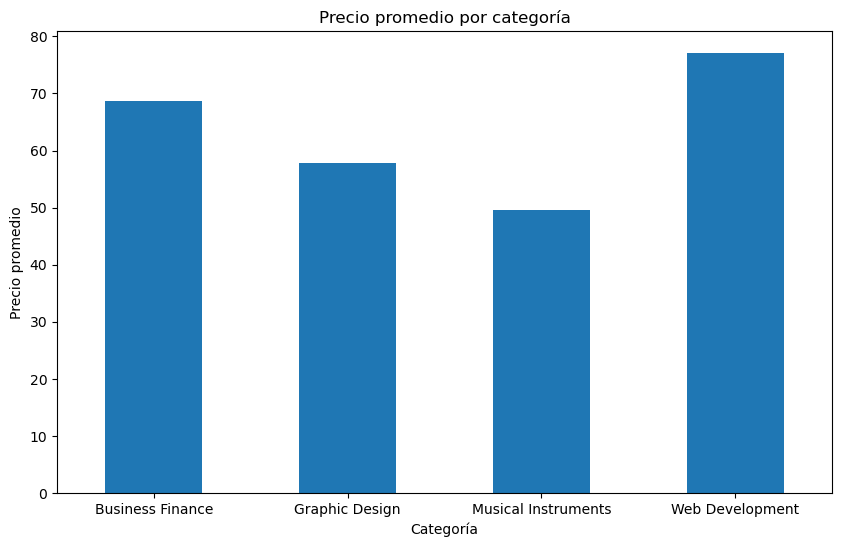

In [121]:
average_price_by_subject = udemy_df.groupby('subject')['price'].mean()

plt.figure(figsize=(10, 6))
average_price_by_subject.plot(kind='bar')

plt.title('Precio promedio por categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio promedio')

plt.xticks(rotation=0)

plt.show()

Observamos que en promedio los cursos de desarrollo web son un poco más costosos que los otros, le siguen los cursos de negocios.

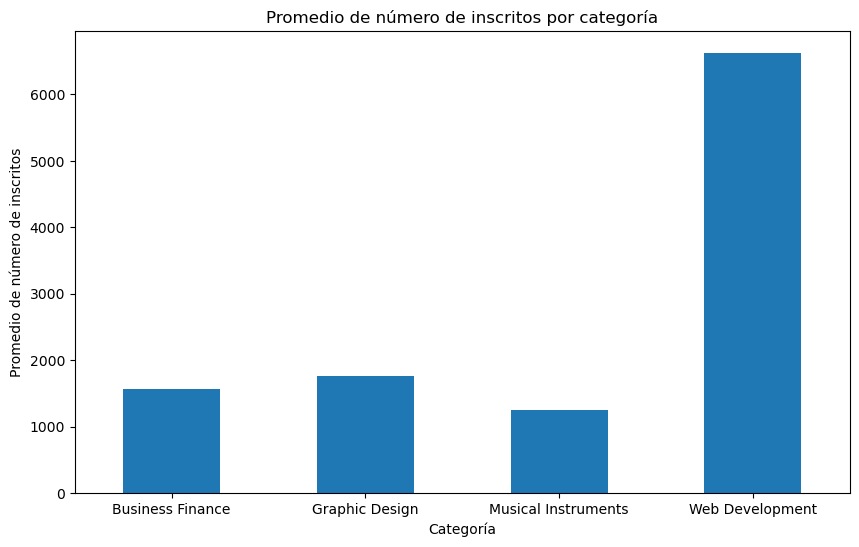

In [122]:
average_subscribers_by_subject = udemy_df.groupby('subject')['num_subscribers'].mean()

plt.figure(figsize=(10, 6))
average_subscribers_by_subject.plot(kind='bar')

plt.title('Promedio de número de inscritos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio de número de inscritos')

plt.xticks(rotation=0)

plt.show()


Aquí podemos ver que por mucho, los cursos con más personas inscritas son los de desarrollo web. En promedio tienen más de 3 veces los alumnos que los otros cursos.

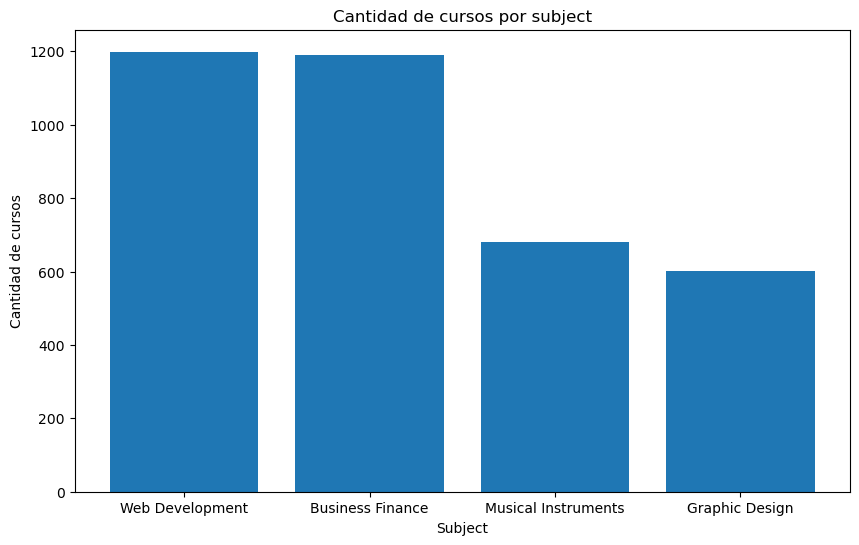

In [123]:
course_counts = udemy_df['subject'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(course_counts.index, course_counts.values)

plt.title('Cantidad de cursos por subject')
plt.xlabel('Subject')
plt.ylabel('Cantidad de cursos')

plt.show()

También podemos ver que la mayoría de cursos se enfocan en desarrollo web y finanzas. Exploraremos un poco más desarrollo web.

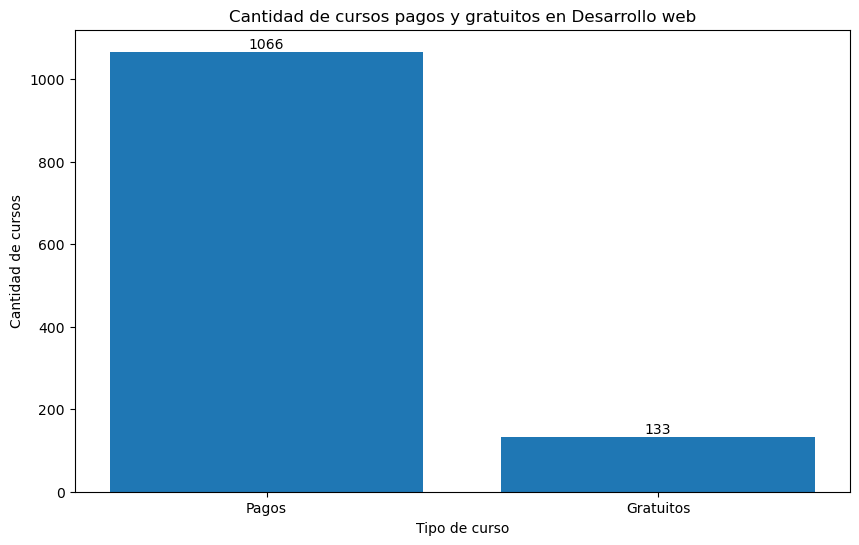

In [124]:
web_dev_df = udemy_df[udemy_df['subject'] == 'Web Development']

paid_courses = web_dev_df[web_dev_df['is_paid'] == True].shape[0]
free_courses = web_dev_df[web_dev_df['is_paid'] == False].shape[0]

plt.figure(figsize=(10, 6))
plt.bar(['Pagos', 'Gratuitos'], [paid_courses, free_courses])

plt.title('Cantidad de cursos pagos y gratuitos en Desarrollo web')
plt.xlabel('Tipo de curso')
plt.ylabel('Cantidad de cursos')

plt.text(0, paid_courses, str(paid_courses), ha='center', va='bottom')
plt.text(1, free_courses, str(free_courses), ha='center', va='bottom')

plt.show()

Hay aproximadamente 8 cursos pagos por cada curso gratuito en desarrollo web. Así que buscamos los alumnos que estén inscritos en cada tipo de curso (pagos y gratuitos).

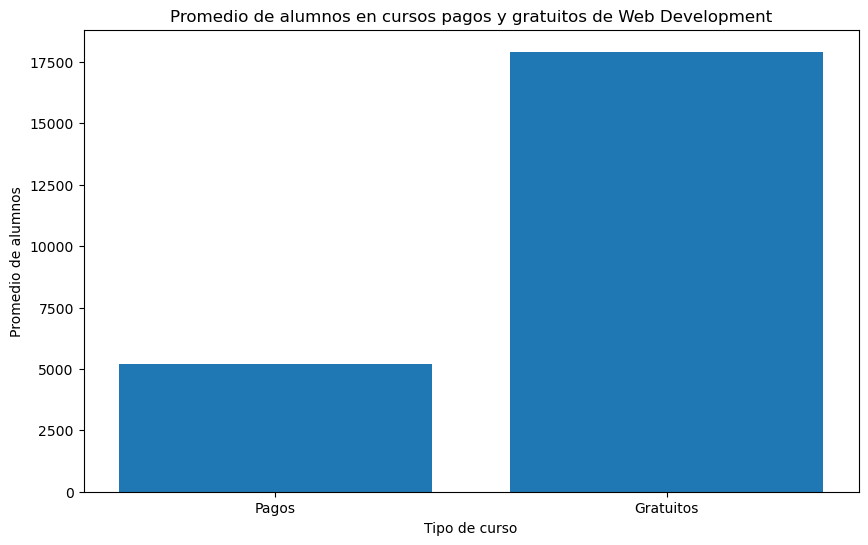

In [125]:
paid_mean_subscribers = web_dev_df[web_dev_df['is_paid'] == True]['num_subscribers'].mean()
free_mean_subscribers = web_dev_df[web_dev_df['is_paid'] == False]['num_subscribers'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Pagos', 'Gratuitos'], [paid_mean_subscribers, free_mean_subscribers])

plt.title('Promedio de alumnos en cursos pagos y gratuitos de Web Development')
plt.xlabel('Tipo de curso')
plt.ylabel('Promedio de alumnos')

plt.show()

Vemos que la media de alumnos por curso decrece en 1000, pero de todos modos supera ampliamente a los demás tipos de cursos que ofrece udemy.

#### En conclusión podemos sacar que el fuerte de udemy son los cursos de desarrollo web, que son los que tienen más inscritos incluso cuando se quitan a los cursos gratuitos de este. Además vemos que sus cursos avanzados no tienen mucha acogida, para esto hay dos hipótesis:

- Que los usuarios hayan encasillado a udemy con una plataforma de cursos para principantes e intermedios.

- No se promocionan estos cursos lo suficiente, además de haber muy poca oferta.

#### En este caso podemos recomendar que se sigan enfocando en los cursos de desarrollo web, que incluso excluyendo los cursos gratis siguen siendo los cursos más inscritos entre todos. Asimismo se recomienda explorar el mercado de los cursos avanzados, ya que podría satisfacer una necesidad insatisfecha y diferenciarse de otras plataformas que se enfocan principalmente en cursos para principiantes e intermedios.

## Explorando coursera y coursera_reviews

In [126]:
coursera_df.head(5)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [127]:
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Podemos ver que no hay nulos, pero hay poca información, revisaremos lo que hay en coursera_reviews

In [128]:
reviews.head(5)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


Empezamos buscando duplicados

In [129]:
dup_reviews = reviews[reviews.duplicated(keep=False)]

In [130]:
dup_reviews[dup_reviews['date_reviews']=='Oct 26, 2018'].head(5)

,reviews,reviewers,date_reviews,rating,course_id
15815,"It is not that much useful, because there is n...",By Girish,"Oct 26, 2018",1,python
15840,"It is not that much useful, because there is n...",By Girish,"Oct 26, 2018",1,python
15865,"It is not that much useful, because there is n...",By Girish,"Oct 26, 2018",1,python
32599,"Great course. Very approachable, well taught,...",By Harry E J J,"Oct 26, 2018",5,python
32624,"Great course. Very approachable, well taught,...",By Harry E J J,"Oct 26, 2018",5,python


Podemos ver que hay muchos duplicados, por lo que se procede a eliminarlos

In [131]:
reviews.drop_duplicates(inplace=True)
reviews

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454636,amazing,By FANISHA A A,"Oct 10, 2020",5,computer-networking
1454639,great,By Ilona Y Z,"Oct 07, 2020",5,computer-networking
1454642,Nice,By Aung T K,"Oct 10, 2020",5,computer-networking
1454643,Good,By Anthony N S,"Oct 08, 2020",5,computer-networking


Se fueron casi 2/3 de los datos que habían y eran redundantes

Ahora aguparemos por course_id para poder unir las calificaciones con el dataframe de coursera

In [132]:
# Agrupa por cada course_id único y le saca la media del rating
ratings = reviews.groupby('course_id')['rating'].mean()
ratings

course_id
aboriginal-education                                        4.552239
access-control-sscp                                         4.466667
accounting-analytics                                        4.395299
accounting-data-analytics-python                            3.500000
actualizacion-manejo-diabetes-tipo-2                        4.845850
                                                              ...   
womens-health-human-rights                                  4.884298
write-a-feature-length-screenplay-for-film-or-television    4.625000
write-your-first-novel                                      3.850000
writing-editing-words                                       4.742857
writing-for-business                                        4.818742
Name: rating, Length: 604, dtype: float64

Además, antes del merge también sacaremos cuántas valoraciones tiene cada curso

In [133]:
reviews_count = reviews.groupby('course_id')['rating'].count()
reviews_count

course_id
aboriginal-education                                         67
access-control-sscp                                          45
accounting-analytics                                        468
accounting-data-analytics-python                              8
actualizacion-manejo-diabetes-tipo-2                        253
                                                           ... 
womens-health-human-rights                                  242
write-a-feature-length-screenplay-for-film-or-television     32
write-your-first-novel                                       20
writing-editing-words                                       105
writing-for-business                                        811
Name: rating, Length: 604, dtype: int64

Procedemos a hacer el merge para tener el rating de los cursos

In [134]:
coursera_df = coursera_df.merge(ratings, on='course_id')
coursera_df = coursera_df.merge(reviews_count, on='course_id')
coursera_df.head(5)

,name,institution,course_url,course_id,rating_x,rating_y
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.739923,12677
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.816438,1460
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.929504,8199
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.767482,12055
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.818182,33


In [135]:
# Renombramos columnas
coursera_df = coursera_df.rename(columns={'name': 'title', 'rating_x': 'rating', 'rating_y': 'reviews_count'})

In [136]:
coursera_df['reviews_count'].describe()

count      604.000000
mean       860.839404
std       1608.604971
min          1.000000
25%        132.750000
50%        387.500000
75%        847.750000
max      15226.000000
Name: reviews_count, dtype: float64

Buscaremos los 10 cursos mejor valorados de Coursera, pero que tengan mínimo unas 100 reviews

In [137]:
coursera_sorted = coursera_df[['title', 'rating', 'reviews_count']].sort_values(by='rating', ascending=False)

coursera_sorted = coursera_sorted[coursera_sorted['reviews_count'] > 100]
coursera_sorted.head(10)

,title,rating,reviews_count
353,El Abogado del Futuro: Legaltech y la Transfor...,4.968000,125
292,Bugs 101: Insect-Human Interactions,4.962963,297
132,Everyday Parenting: The ABCs of Child Rearing,4.929530,596
2,The Science of Well-Being,4.929504,8199
329,Understanding Medical Research: Your Facebook ...,4.925094,267
198,Addiction Treatment: Clinical Skills for Healt...,4.924812,133
199,Dino 101: Dinosaur Paleobiology,4.922148,745
335,In the Studio: Postwar Abstract Painting,4.921739,460
421,Revisão Sistemática e Meta-análise,4.921109,469
424,Aprendiendo a aprender: Poderosas herramientas...,4.919417,3090


#### Nos encontramos con que el curso con mejor valoración es uno en español, además del décimo, de ahí hay unos 7 en inglés, y uno en portugés

In [138]:
# Continuando el análisis
print(len(coursera_df.groupby('institution')['rating'].mean()))
print(coursera_df.groupby('institution')['rating'].mean())

132
institution
(ISC)²                                      4.466667
Advancing Women in Product                  4.600000
Alberta Machine Intelligence Institute      4.569660
Amazon Web Services                         4.514876
American Museum of Natural History          4.734177
                                              ...   
Yale University                             4.864901
Yandex                                      3.484127
Yonsei University                           4.883041
École Polytechnique                         4.845122
École Polytechnique Fédérale de Lausanne    4.656879
Name: rating, Length: 132, dtype: float64


Procedemos a buscar correlaciones en el dataset, agrupándolos con la función creada para explorar edx

In [139]:
# Utilizamos type institution que creamos para edx
coursera_df['type_ins'] = coursera_df['institution'].apply(type_institution)

Procedemos a graficar el tipo de instituto y su relación con el rating

In [140]:
rating_mean_by_institution = coursera_df.groupby('type_ins')['rating'].mean()

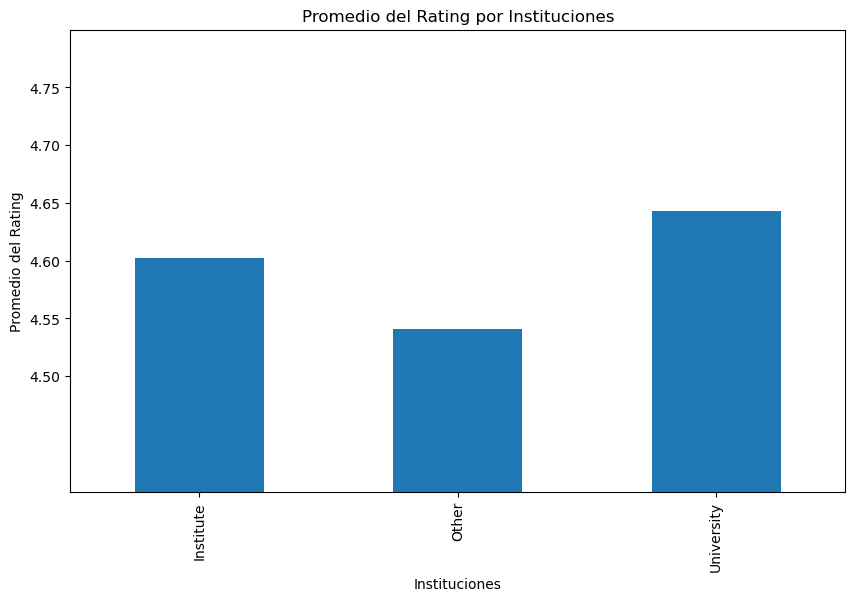

In [141]:
plt.figure(figsize=(10, 6))
rating_mean_by_institution.plot(kind='bar')

plt.title('Promedio del Rating por Instituciones')
plt.ylim(4.4, 4.8)
plt.yticks([4.5, 4.55, 4.6, 4.65, 4.7, 4.75])
plt.ylabel('Promedio del Rating')
plt.xlabel('Instituciones')

plt.show()

En esta gráfica podemos ver que University tiene un promedio ligeramente mayor a los institutos y otras instituciones de enseñanza

Vemos cuántos cursos tiene cada tipo de institución

In [142]:
coursera_df['type_ins'].value_counts()

University    458
Other         128
Institute      18
Name: type_ins, dtype: int64

Por último sacamos la proporción de votos respecto al tipo de institución

In [143]:
coursera_df.groupby('type_ins')['reviews_count'].sum() / coursera_df['type_ins'].value_counts()

Institute      815.833333
Other         1038.257812
University     813.024017
dtype: float64

Hemos visto que 'otros' tiene una calificación ligeramente inferior a las otras instituciones, pero así mismo tienen más de 200 votos en promedio que las anteriores, así que buscamos correlación.

<Figure size 1000x600 with 0 Axes>

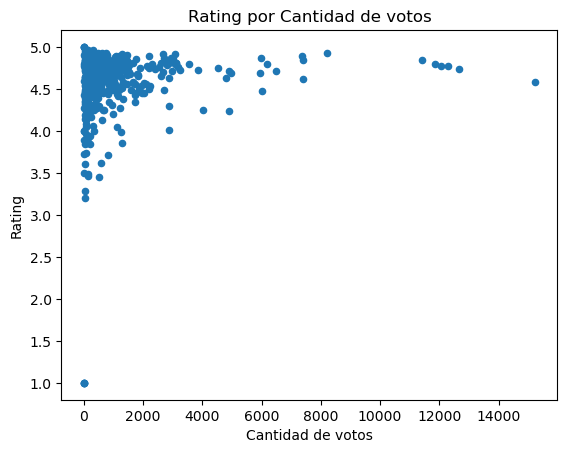

In [144]:
# Buscando la correlación entre el rating y la cantidad de votos
plt.figure(figsize=(10, 6))

coursera_df[['reviews_count', 'rating']].plot(x='reviews_count', y='rating', kind='scatter')

plt.title('Rating por Cantidad de votos')
plt.ylabel('Rating')
plt.xlabel('Cantidad de votos')

plt.show()

Si bien entre 12000 y 14000 votos se puede observar que el rating empieza a decaer, no se puede saber con certeza si estas variables están correlacionadas, ya que más del 90% de los datos se encuentran entre 1 y 4000 votos

#### En conclusión, podemos decir que en Coursera hay muchos más cursos impartidos por universidades, estos también son los mejor valorados. También podemos observar que 'otros' tiene una calificación ligeramente inferior a las universidades e institutos

## Exportando los datos